In [1]:
import pandas as pd
import kaggle
import zipfile

In [2]:
!kaggle competitions download -c dogs-vs-cats

dogs-vs-cats.zip: Skipping, found more recently modified local copy (use --force to force download)


In [3]:
zipfile_name = 'dogs-vs-cats.zip'
with zipfile.ZipFile(zipfile_name, 'r') as file:
    file.extractall()

In [4]:
zipfile_name = 'train.zip'
with zipfile.ZipFile(zipfile_name, 'r') as file:
    file.extractall()

In [5]:
zipfile_name = 'test1.zip'
with zipfile.ZipFile(zipfile_name, 'r') as file:
    file.extractall()

In [6]:
import os
#counting number of files
path, dirs, files = next(os.walk('C:\\Users\\Zooby\\Desktop\\Personal Projects\\Dog_Cat\\train'))
file_count = len(files)
print("Number of images: ", file_count)

Number of images:  25000


###### Printing the name of images

In [7]:
file_names = os.listdir('C:\\Users\\Zooby\\Desktop\\Personal Projects\\Dog_Cat\\train')
print(file_names)

['cat.0.jpg', 'cat.1.jpg', 'cat.10.jpg', 'cat.100.jpg', 'cat.1000.jpg', 'cat.10000.jpg', 'cat.10001.jpg', 'cat.10002.jpg', 'cat.10003.jpg', 'cat.10004.jpg', 'cat.10005.jpg', 'cat.10006.jpg', 'cat.10007.jpg', 'cat.10008.jpg', 'cat.10009.jpg', 'cat.1001.jpg', 'cat.10010.jpg', 'cat.10011.jpg', 'cat.10012.jpg', 'cat.10013.jpg', 'cat.10014.jpg', 'cat.10015.jpg', 'cat.10016.jpg', 'cat.10017.jpg', 'cat.10018.jpg', 'cat.10019.jpg', 'cat.1002.jpg', 'cat.10020.jpg', 'cat.10021.jpg', 'cat.10022.jpg', 'cat.10023.jpg', 'cat.10024.jpg', 'cat.10025.jpg', 'cat.10026.jpg', 'cat.10027.jpg', 'cat.10028.jpg', 'cat.10029.jpg', 'cat.1003.jpg', 'cat.10030.jpg', 'cat.10031.jpg', 'cat.10032.jpg', 'cat.10033.jpg', 'cat.10034.jpg', 'cat.10035.jpg', 'cat.10036.jpg', 'cat.10037.jpg', 'cat.10038.jpg', 'cat.10039.jpg', 'cat.1004.jpg', 'cat.10040.jpg', 'cat.10041.jpg', 'cat.10042.jpg', 'cat.10043.jpg', 'cat.10044.jpg', 'cat.10045.jpg', 'cat.10046.jpg', 'cat.10047.jpg', 'cat.10048.jpg', 'cat.10049.jpg', 'cat.1005.jpg'

###### Importing dependencies

In [8]:
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from sklearn.model_selection import train_test_split
import cv2


C:\Users\Zooby\anaconda3\lib\site-packages\scipy\__init__.py:155: UserWarning: A NumPy version >=1.18.5 and <1.25.0 is required for this version of SciPy (detected version 1.26.4
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


###### Displaying the images of dogs and cats

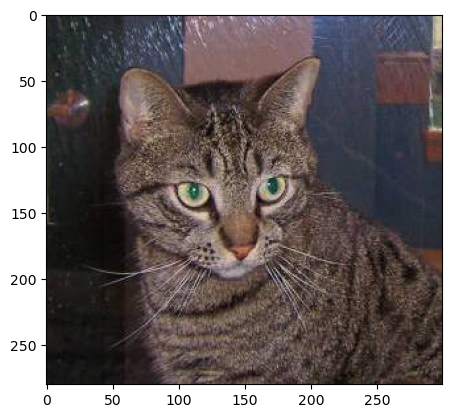

In [9]:
#display image
img = mpimg.imread('C:\\Users\\Zooby\\Desktop\\Personal Projects\\Dog_Cat\\train\\cat.1.jpg')
imgplt = plt.imshow(img)
plt.show()

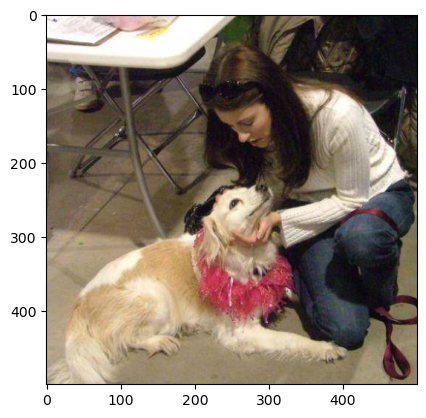

In [10]:
#displaying a dog image
img = mpimg.imread('C:\\Users\\Zooby\\Desktop\\Personal Projects\\Dog_Cat\\train\\dog.1942.jpg')
imgplt = plt.imshow(img)
plt.show()

In [11]:
file_names = os.listdir('C:\\Users\\Zooby\\Desktop\\Personal Projects\\Dog_Cat\\train')
for i in range(5):
    name = file_names[i]
    print(name[0:3])
    

cat
cat
cat
cat
cat


In [12]:
#calculating count of dogs vs count
file_names = os.listdir('C:\\Users\\Zooby\\Desktop\\Personal Projects\\Dog_Cat\\train')

dog_count = 0
cat_count = 0
for img_file in file_names:
    name = img_file[0:3] #this slices the first 3 letters of the file name
    
    if name == 'dog':
        dog_count += 1
    else:
        cat_count += 1
        
print("Number of dog images = ", dog_count)
print("Number of cat images = ", cat_count)
        

Number of dog images =  12500
Number of cat images =  12500


###### Resize images

In [14]:
os.mkdir('C:\\Users\\Zooby\\Desktop\\Personal Projects\\Dog_Cat\\image_resized')

In [15]:
original_folder = 'C:\\Users\\Zooby\\Desktop\\Personal Projects\\Dog_Cat\\train\\'
resized_folder = 'C:\\Users\\Zooby\\Desktop\\Personal Projects\\Dog_Cat\\image_resized\\'

for filename in os.listdir(original_folder):
    img_path = original_folder+filename
    
    img = Image.open(img_path)
    img = img.resize((224, 224))
    img = img.convert('RGB')
    
    newImgPath = resized_folder+filename
    img.save(newImgPath)

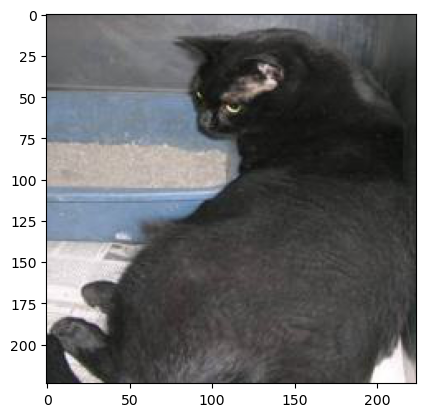

In [18]:
#display resized image
img = mpimg.imread('C:\\Users\\Zooby\\Desktop\\Personal Projects\\Dog_Cat\\image_resized\\cat.2662.jpg')
imgplt = plt.imshow(img)
plt.show()

###### creating labels based on filename (if file starts with dog, label it as dog and vice versa)

###### Cat = 0
###### Dog = 1

In [24]:

directory = 'C:\\Users\\Zooby\\Desktop\\Personal Projects\\Dog_Cat\\image_resized'
filenames = os.listdir(directory)
labels = []

for file_name in filenames:
    label = file_name.split('.')[0]  # Extract label from filename
    if label == 'dog':
        labels.append(1)
    else:
        labels.append(0)

# Check the labels
print(labels)


[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 

In [26]:
print(filenames[0:5])
print(len(filenames))

['cat.0.jpg', 'cat.1.jpg', 'cat.10.jpg', 'cat.100.jpg', 'cat.1000.jpg']
25000


In [28]:
print(labels[0:10])
print(len(labels))

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
25000


In [29]:
values, counts = np.unique(labels, return_counts = True)
print(values)
print(counts)

[0 1]
[12500 12500]


###### Convert all resized image to numpy arrays

In [30]:
import cv2
import glob

In [35]:
directory = 'C:\\Users\\Zooby\\Desktop\\Personal Projects\\Dog_Cat\\image_resized\\'

image_extension = ['png', 'jpg']
files = []

[files.extend(glob.glob(directory + '*.' + e)) for e in image_extension]

dog_cat_images = np.asarray([cv2.imread(file) for file in files])

In [36]:
print(dog_cat_images)

[[[[ 87 163 205]
   [ 89 165 207]
   [ 92 168 210]
   ...
   [125 203 246]
   [123 200 246]
   [123 200 246]]

  [[ 87 163 205]
   [ 89 165 207]
   [ 92 168 210]
   ...
   [125 203 246]
   [124 201 247]
   [123 200 246]]

  [[ 87 163 205]
   [ 89 165 207]
   [ 92 168 210]
   ...
   [125 203 246]
   [124 201 247]
   [124 201 247]]

  ...

  [[ 57 123 158]
   [ 57 123 158]
   [ 56 124 159]
   ...
   [  0   2   1]
   [  0   2   1]
   [  0   2   1]]

  [[ 55 121 156]
   [ 56 122 157]
   [ 55 123 158]
   ...
   [  0   2   1]
   [  0   2   1]
   [  0   2   1]]

  [[ 54 120 155]
   [ 54 120 155]
   [ 53 121 156]
   ...
   [  0   2   1]
   [  0   2   1]
   [  0   2   1]]]


 [[[ 43  43  37]
   [ 47  47  41]
   [ 47  47  41]
   ...
   [181 207 207]
   [169 199 200]
   [161 194 197]]

  [[ 42  42  36]
   [ 46  46  40]
   [ 45  45  39]
   ...
   [176 202 202]
   [167 196 200]
   [164 197 200]]

  [[ 42  42  36]
   [ 44  44  38]
   [ 43  43  37]
   ...
   [168 194 194]
   [165 194 198]
   [168 200

In [37]:
dog_cat_images.shape

(25000, 224, 224, 3)

###### Seperating features and labels

In [38]:
X = dog_cat_images
Y = np.asarray(labels)

###### Train test split

In [42]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size = .2, stratify = Y)

In [43]:
print(X.shape, X_train.shape, X_test.shape)

(25000, 224, 224, 3) (20000, 224, 224, 3) (5000, 224, 224, 3)


###### scaling the data

In [44]:
X_trained_scaled = X_train/255
X_test_scaled = X_test/255

In [45]:
print(X_trained_scaled)

[[[[0.63921569 0.62352941 0.72156863]
   [0.63921569 0.62352941 0.72156863]
   [0.63921569 0.62745098 0.71372549]
   ...
   [0.18823529 0.17647059 0.18431373]
   [0.16470588 0.15686275 0.15686275]
   [0.16078431 0.15294118 0.15294118]]

  [[0.66666667 0.65098039 0.74901961]
   [0.65882353 0.64313725 0.74117647]
   [0.65098039 0.63921569 0.7254902 ]
   ...
   [0.21176471 0.2        0.20784314]
   [0.19215686 0.18039216 0.18823529]
   [0.19215686 0.18431373 0.18431373]]

  [[0.69019608 0.6745098  0.77254902]
   [0.68235294 0.66666667 0.76470588]
   [0.6745098  0.6627451  0.74901961]
   ...
   [0.21176471 0.20784314 0.22352941]
   [0.19607843 0.19215686 0.20784314]
   [0.19607843 0.19215686 0.2       ]]

  ...

  [[0.71764706 0.73333333 0.77647059]
   [0.72156863 0.7372549  0.78039216]
   [0.72941176 0.74509804 0.78823529]
   ...
   [0.53333333 0.59607843 0.64705882]
   [0.5254902  0.58823529 0.63921569]
   [0.5372549  0.6        0.65098039]]

  [[0.76470588 0.77254902 0.81176471]
   [0.7

In [117]:
X_trained_scaled.shape

(20000, 224, 224, 3)

###### Building Neural Network

In [148]:
from tensorflow.keras.applications import VGG16
from tensorflow.keras.applications.vgg16 import preprocess_input
# instantiate the base model
base_model = VGG16(weights='imagenet', include_top=False, input_shape=(224,224,3))

# Freezing the CNN layers
for layer in base_model.layers:
    layer.trainable = False
    
# Base model summary
base_model.summary()

Model: "vgg16"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_26 (InputLayer)     │ (None, 224, 224, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_conv1 (Conv2D)           │ (None, 224, 224, 64)   │         1,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_conv2 (Conv2D)           │ (None, 224, 224, 64)   │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_pool (MaxPooling2D)      │ (None, 112, 112, 64)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_conv1 (Conv2D)           │ (None, 112, 112, 128)  │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_conv2 (Conv2D)           │ (None, 112, 112, 128)  │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_pool (MaxPooling2D)      │ (None, 56, 56, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv1 (Conv2D)           │ (None, 56, 56, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv2 (Conv2D)           │ (None, 56, 56, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv3 (Conv2D)           │ (None, 56, 56, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_pool (MaxPooling2D)      │ (None, 28, 28, 256)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv1 (Conv2D)           │ (None, 28, 28, 512)    │     1,180,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv2 (Conv2D)           │ (None, 28, 28, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv3 (Conv2D)           │ (None, 28, 28, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_pool (MaxPooling2D)      │ (None, 14, 14, 512)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv1 (Conv2D)           │ (None, 14, 14, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv2 (Conv2D)           │ (None, 14, 14, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv3 (Conv2D)           │ (None, 14, 14, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_pool (MaxPooling2D)      │ (None, 7, 7, 512)      │             0 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 14,714,688 (56.13 MB)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 14,714,688 (56.13 MB)

In [149]:
model_vgg = keras.Sequential(
    [
        base_model,
        keras.layers.Flatten(),
        keras.layers.Dense(512, activation='relu'),
        keras.layers.Dropout(0.3),
        keras.layers.Dense(256, activation='relu'),
        keras.layers.Dropout(0.3),
        keras.layers.Dense(1, activation='sigmoid')
    ]
)

# compile the model 
model_vgg.compile(optimizer='adamax', loss='binary_crossentropy', metrics=['accuracy'])

# Define batch size
BATCH_SIZE = 100

# Create a TensorFlow Dataset
dataset = tf.data.Dataset.from_tensor_slices((X_train, Y_train))
dataset = dataset.shuffle(buffer_size=10000).batch(BATCH_SIZE)

# Train the model
model_vgg.fit(dataset, epochs=5)
# model summary
model_vgg.summary()

Epoch 1/5
200/200 ━━━━━━━━━━━━━━━━━━━━ 1005s 5s/step - accuracy: 0.9146 - loss: 2.7019
Epoch 2/5
200/200 ━━━━━━━━━━━━━━━━━━━━ 1071s 5s/step - accuracy: 0.9718 - loss: 0.1853
Epoch 3/5
200/200 ━━━━━━━━━━━━━━━━━━━━ 999s 5s/step - accuracy: 0.9836 - loss: 0.1038
Epoch 4/5
200/200 ━━━━━━━━━━━━━━━━━━━━ 997s 5s/step - accuracy: 0.9879 - loss: 0.0626
Epoch 5/5
200/200 ━━━━━━━━━━━━━━━━━━━━ 999s 5s/step - accuracy: 0.9924 - loss: 0.0408


Model: "sequential_20"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ vgg16 (Functional)              │ (None, 7, 7, 512)      │    14,714,688 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_8 (Flatten)             │ (None, 25088)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_26 (Dense)                │ (None, 512)            │    12,845,568 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_8 (Dropout)             │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_27 (Dense)                │ (None, 256)            │       131,328 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_9 (Dropout)             │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_28 (Dense)                │ (None, 1)              │           257 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 53,646,149 (204.64 MB)

 Trainable params: 12,977,153 (49.50 MB)

 Non-trainable params: 14,714,688 (56.13 MB)

 Optimizer params: 25,954,308 (99.01 MB)

In [155]:
batch_size = 64
score, acc = model_vgg.evaluate(X_test_scaled, Y_test, batch_size = batch_size)
print('Test Loss =', score)
print('Test Accuracy =', acc)

MemoryError: Unable to allocate 2.80 GiB for an array with shape (5000, 224, 224, 3) and data type float32

In [151]:
input_image_path = input('Path of the image to be predicted: ')

input_image = cv2.imread(input_image_path)

#cv2_imshow(input_image)

input_image_resize = cv2.resize(input_image, (224,224))

input_image_scaled = input_image_resize/255

image_reshaped = np.reshape(input_image_scaled, [1,224,224,3])

input_prediction = model.predict(image_reshaped)

print(input_prediction)

input_pred_label = np.argmax(input_prediction)

print(input_pred_label)

if input_pred_label == 0:
  print('The image represents a Cat')

else:
  print('The image represents a Dog')

Path of the image to be predicted: C:\Users\Zooby\Desktop\Personal Projects\Dog_Cat\train\dog.01.jpg


error: OpenCV(4.9.0) D:\a\opencv-python\opencv-python\opencv\modules\imgproc\src\resize.cpp:4152: error: (-215:Assertion failed) !ssize.empty() in function 'cv::resize'


In [118]:
import tensorflow as tf
import tensorflow_hub as hub
from tensorflow import keras

In [119]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape = (20000, 224, 224, 3)), #input layer - note: 30 because it represents the number of features you have in your dataset
    keras.layers.Dense(20, activation = 'relu'), #hidden layer - note: 20 represents number of neurons
    keras.layers.Dense(2, activation = 'sigmoid') #output layer - important note: the 2 parameter represents how many classes there are for the target label (0,1). if there are more than 2 labels, the parameter changes accordingly
])

ResourceExhaustedError: {{function_node __wrapped__StatelessRandomUniformV2_device_/job:localhost/replica:0/task:0/device:CPU:0}} OOM when allocating tensor with shape[3010560000,20] and type float on /job:localhost/replica:0/task:0/device:CPU:0 by allocator mklcpu [Op:StatelessRandomUniformV2] name: 

In [ ]:
#look into optimizers, loss (one hot encoding label encoding)
model.compile(optimizer = 'adam',
              loss = 'sparse_categorical_crossentropy',
              metrics = ['accuracy']
             )

In [ ]:
history = model.fit(X_trained_scaled, Y_train, validation_split= .1, epochs = 20) #epochs = how many iterations will the model go thru data

In [110]:
mobilenet_v2 = "https://tfhub.dev/google/tf2-preview/mobilenet_v2/classification/4"

# Load the classifier model from TensorFlow Hub
loaded_model = hub.load(mobilenet_v2)

# Print all available signatures of the loaded model
print("Available Signatures:", loaded_model.signatures.keys())

# Iterate through all signatures and print their inputs/outputs
for signature_name, signature in loaded_model.signatures.items():
    print(f"\nSignature: {signature_name}")
    print("Inputs:", signature.inputs)
    print("Outputs:", signature.outputs)

Available Signatures: KeysView(_SignatureMap({}))


In [125]:
mobilenet_v2 ="https://tfhub.dev/google/tf2-preview/mobilenet_v2/classification/4"
inception_v3 = "https://tfhub.dev/google/imagenet/inception_v3/classification/5"

classifier_model = inception_v3

In [126]:
num_of_classes = 2

IMAGE_SHAPE = (224, 224)

# Define the input layer
input_layer = tf.keras.layers.Input(shape=IMAGE_SHAPE + (3,))

# Load the classifier model as a KerasLayer
loaded_model = hub.KerasLayer(classifier_model, trainable=False)(input_layer)

# Print the shape of the output tensor
print("Shape of the output tensor:", loaded_model.shape)

# Flatten the output of the loaded model
flatten_layer = tf.keras.layers.Flatten()(loaded_model)

# Output layer
output_layer = tf.keras.layers.Dense(num_of_classes)(flatten_layer)

# Create the model
model = tf.keras.Model(inputs=input_layer, outputs=output_layer)

# Print model summary
model.summary()

ValueError: Exception encountered when calling layer 'keras_layer_15' (type KerasLayer).

A KerasTensor is symbolic: it's a placeholder for a shape an a dtype. It doesn't have any actual numerical value. You cannot convert it to a NumPy array.

Call arguments received by layer 'keras_layer_15' (type KerasLayer):
  • inputs=<KerasTensor shape=(None, 224, 224, 3), dtype=float32, sparse=None, name=keras_tensor_42>
  • training=None

In [74]:
model.compile(
    optimizer = 'adam',
    loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    metrics = ['acc']
)

In [75]:
score, acc = model.evaluate(X_test_scaled, Y_test)
print('Test Loss =', score)
print('Test Accuracy =', acc)

157/157 ━━━━━━━━━━━━━━━━━━━━ 38s 235ms/step - acc: 0.4387 - loss: 0.8679
Test Loss = 0.8867426514625549
Test Accuracy = 0.4235999882221222
